## 1. Support Vector Machine

**Support Vector Machine (SVM)** is a powerful supervised learning algorithm used for both classification and regression tasks.
It works by finding the optimal hyperplane that best separates different classes in the feature space.

The primary objective of the SVM algorithm is to identify a hyperplane that distinguishably segregates the data points of different classes. The hyperplane is localized in such a manner that the largest margin separates the classes under consideration.

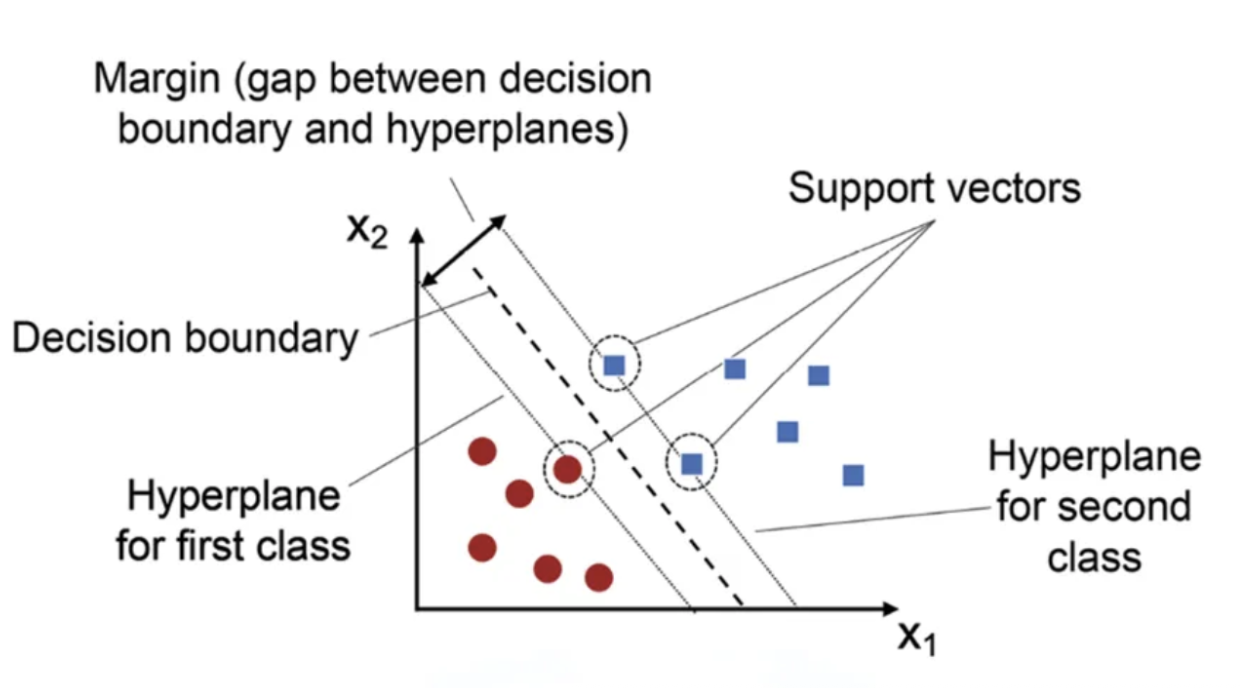

### Support Vectors: 
Data points that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM). These data points are important because they determine the position and orientation of the hyperplane, and thus have a significant impact on the classification accuracy of the SVM. In fact, SVMs are named after these support vectors because they “support” or define the decision boundary.

- Support Vector Classifier

  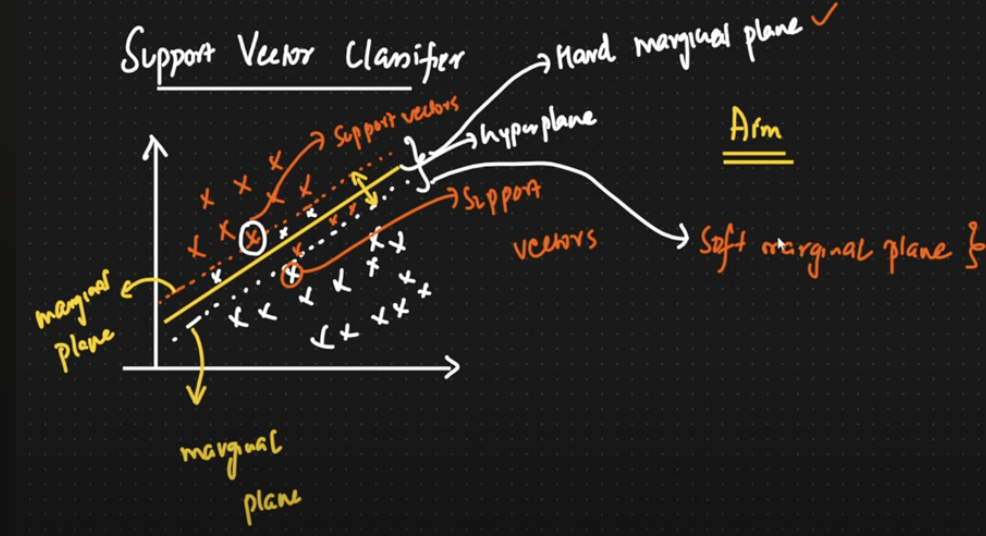

  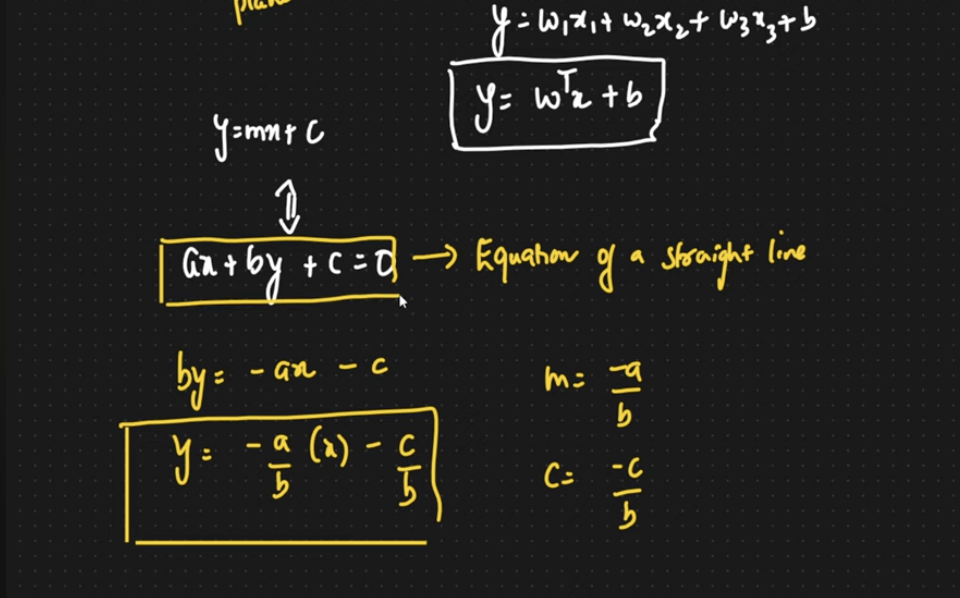

### Hyperplane
A hyperplane is a decision boundary that separates data points into different classes in a high-dimensional space

### Margin
A margin is the distance between the decision boundary (hyperplane) and the closest data points from each class. The goal of SVMs is to maximize this margin while minimizing classification errors.

The distance between **hyperplane(best fit line)** and both **marginal plane** has be equi distance and needs to be maximum. The perfect hyper and both marginal plane is called **Hard Marginal PLane**. Which is less likely to exist in real world. If there is any error in the distance between hyperplane and both marginal plane it is **soft marginal plane**. Which we mostly work with.

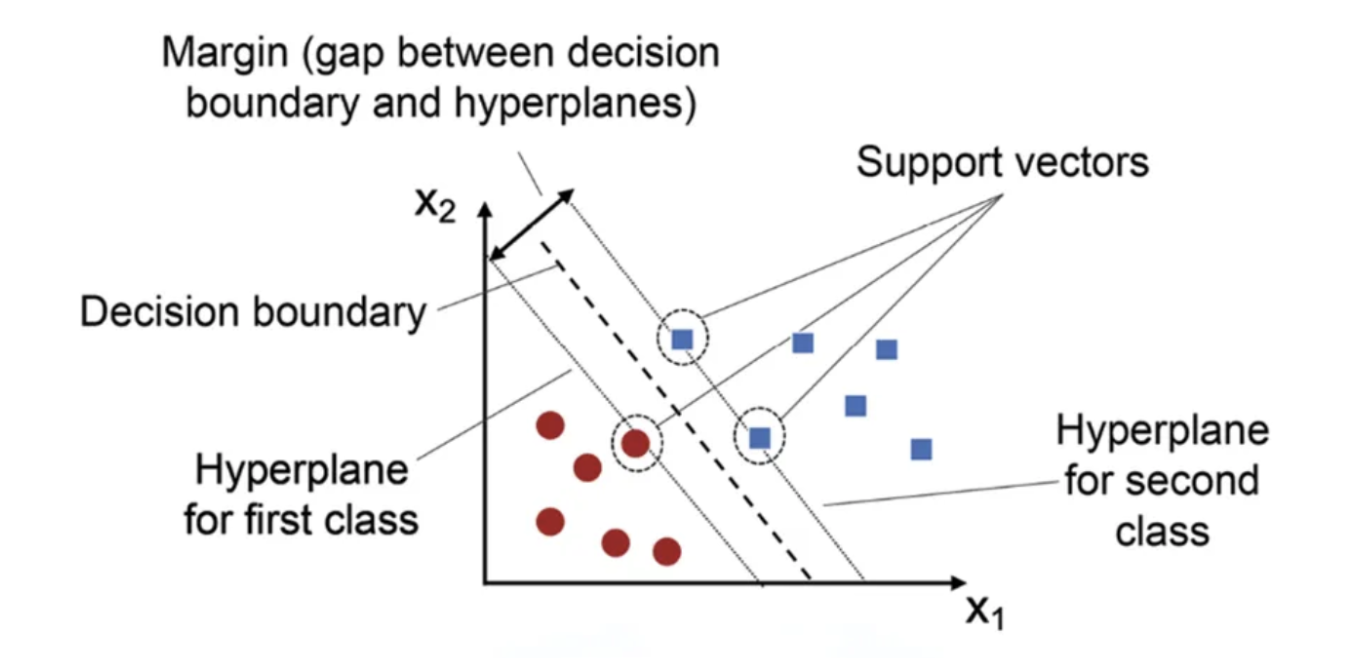

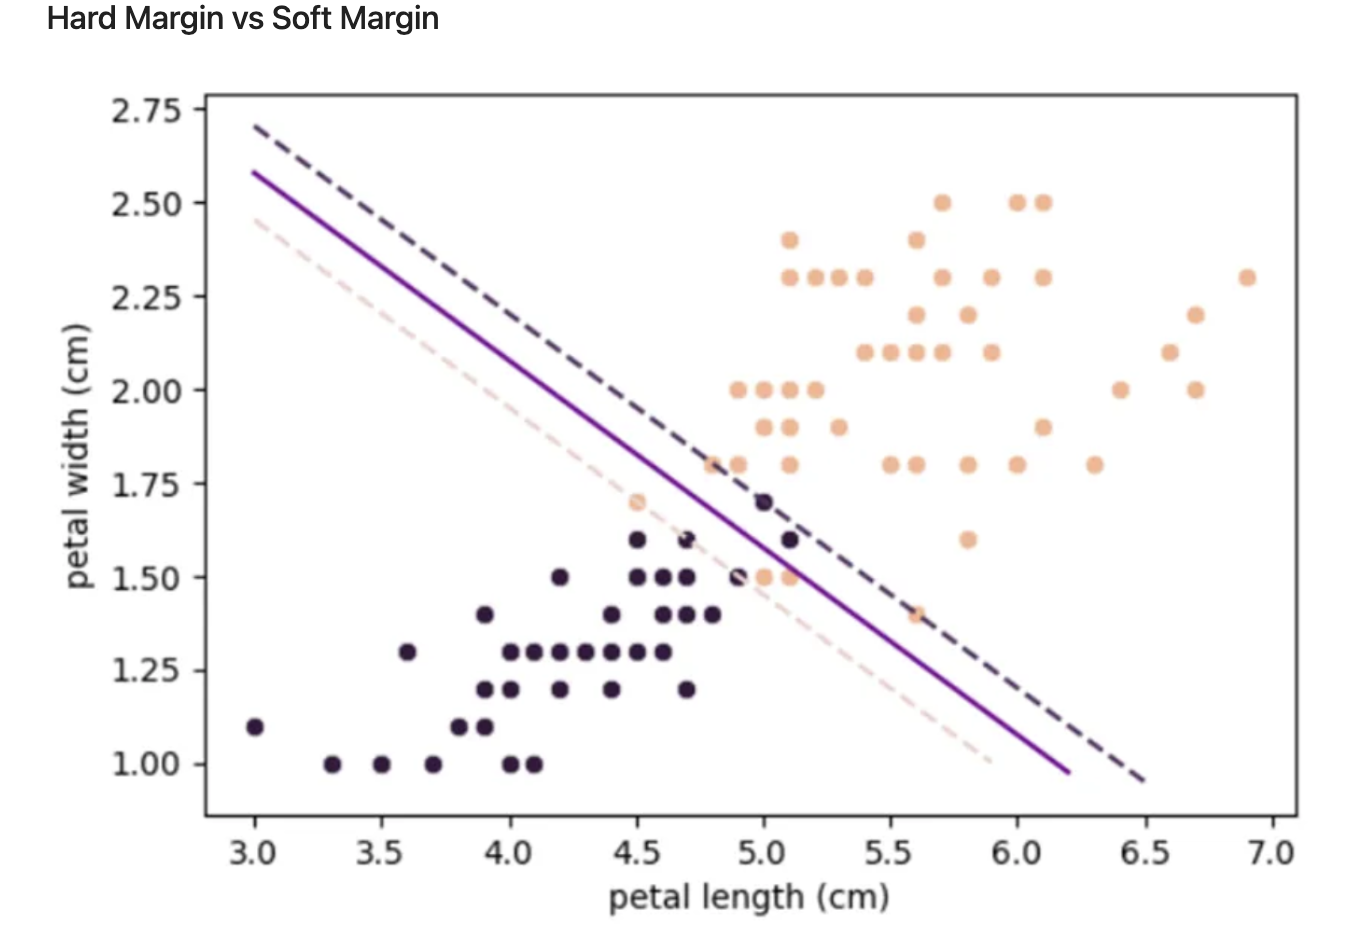


Soft margins are implemented by introducing a slack variable for each data point, which allows the SVM to tolerate some degree of misclassification error. The amount of tolerance is controlled by a parameter called the regularization hyperparameter C, which determines how much weight should be given to minimizing classification errors versus maximizing the margin.

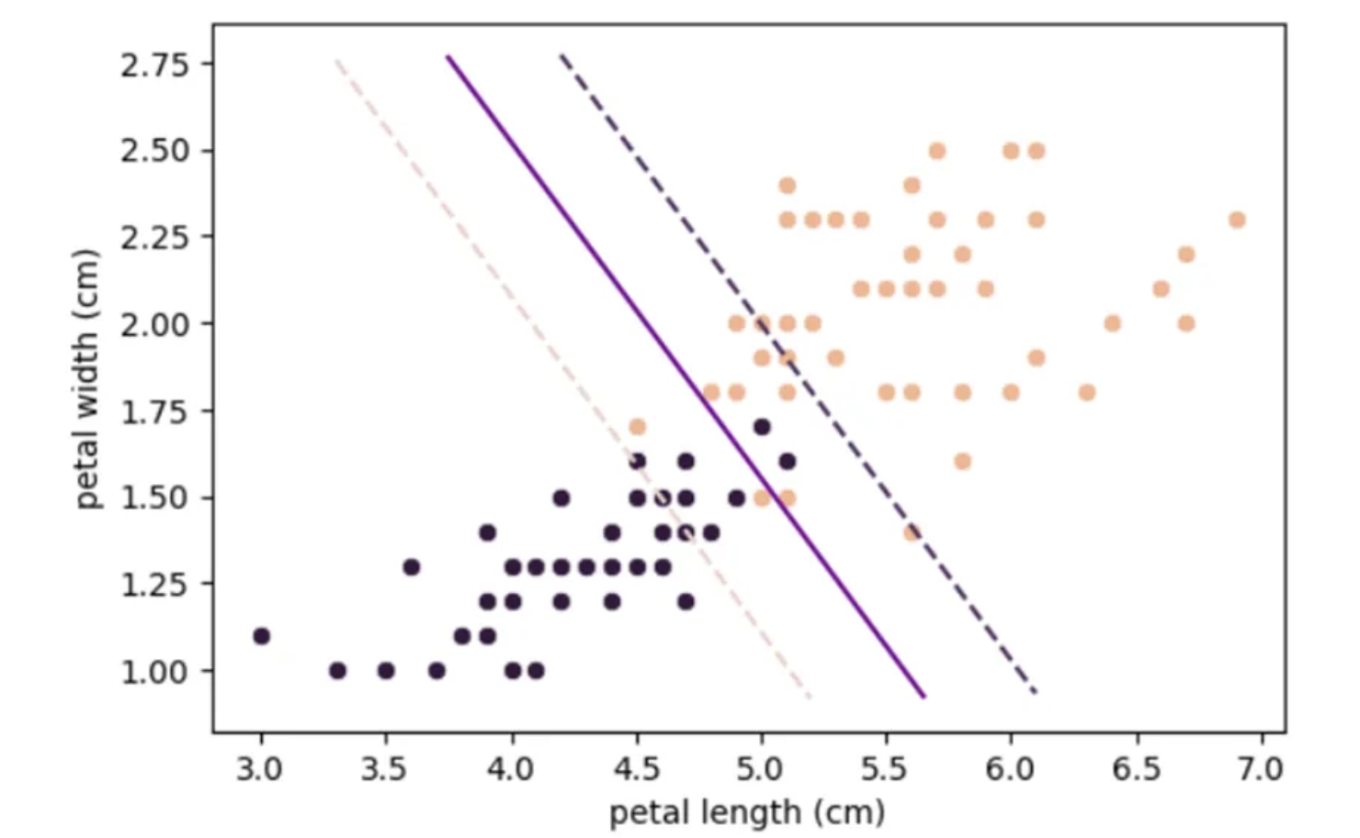



high gama--> **high regularization (C)**
  
low gama--> **low regularization (C)**

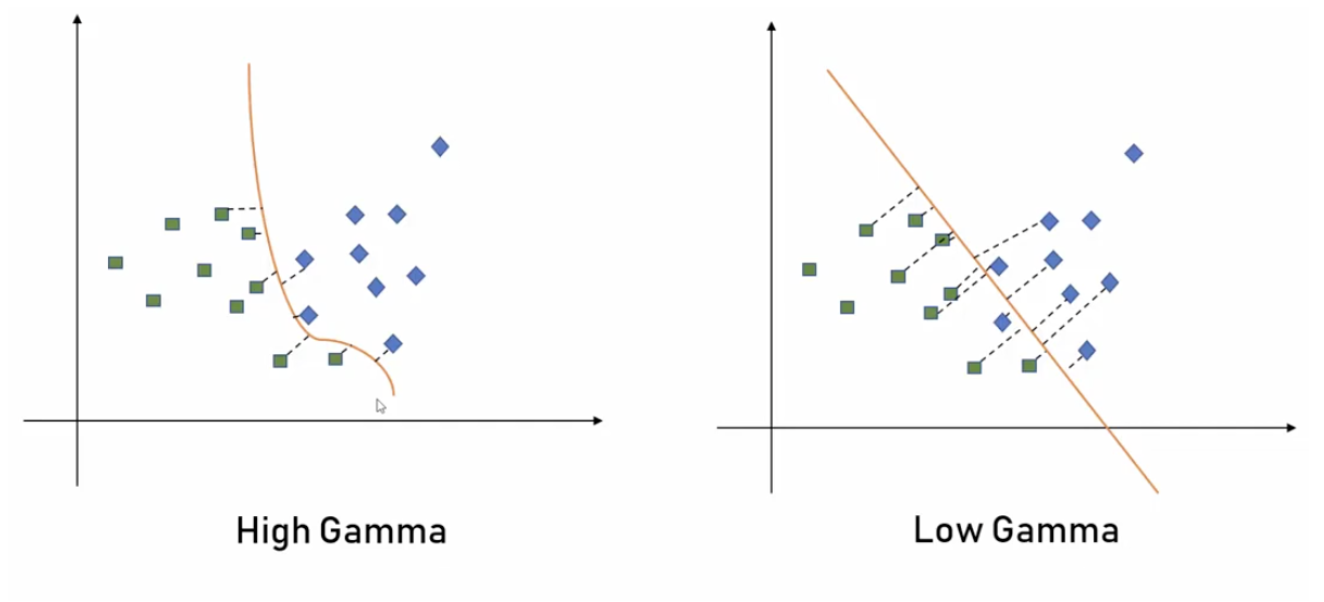

### Characteristics of SVM

- **Handles Non-Linear Data:** SVM can handle non-linear data using the “kernel trick,” which transforms the data into a higher-dimensional space where it becomes easier to separate.
- **Effective in High Dimensions:** SVM works well even when the number of features (dimensions) is much larger than the number of samples, making it suitable for complex datasets.
- **Robust to Overfitting:** By focusing on the points closest to the boundary (support vectors), SVM is less likely to overfit, especially in smaller datasets.


## 2. Mathematical Formulation of SVM

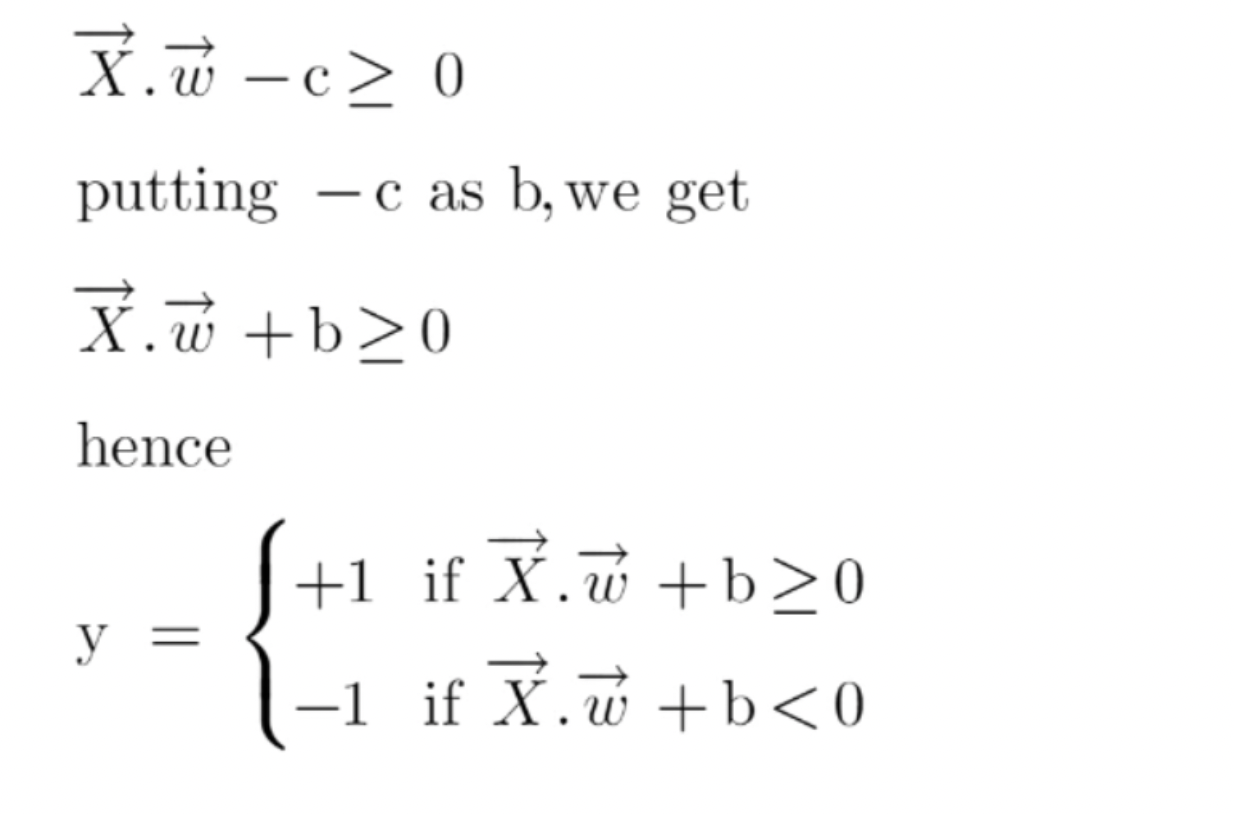

### Decision Function:
For a given dataset (X, y), SVM finds the optimal hyperplane defined by:

    f(X) = wX + b

where w is the weight vector and b is the bias term.

### Optimization Objective:
SVM aims to maximize the margin (distance between the separating hyperplane and the nearest data points, called support vectors):

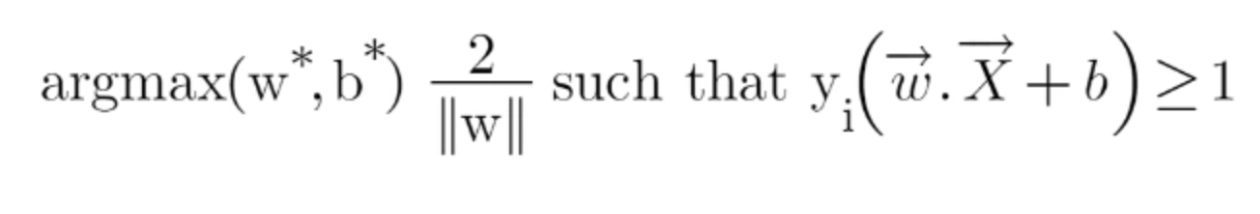


solved using Karush-Kuhn-Tucker (KKT) conditions. in Sklearn Sequential Minimal Optimization (SMO) algorithm is usd

## 3. SVM Kernels and When to Use Them

**Non-Liear Data**: Dataset that cannot be separated by a single straight line or hyperplane in their original feature space. 

For example, consider a dataset shaped like two concentric circles, where one circle represents one class and the other circle represents another class. In its original two-dimensional space, this data is not linearly separable. However, by using a kernel function, such as the Radial Basis Function (RBF) kernel, the data can be transformed into a higher-dimensional space where it becomes linearly separable.

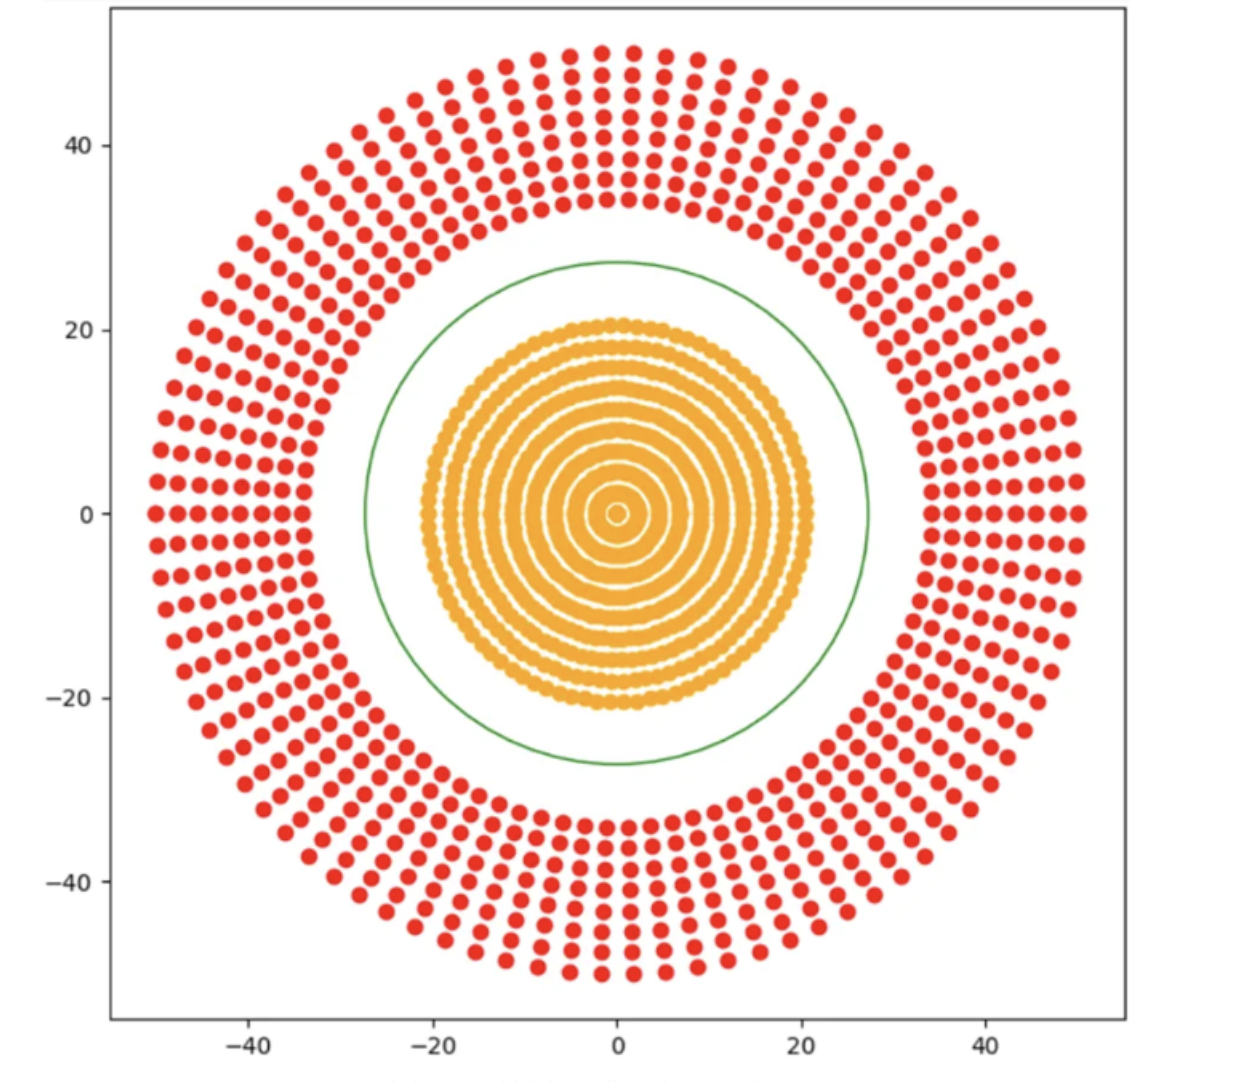

To handle such data, non-linear SVMs employ **kernel functions** to map the data into a higher-dimensional space where it becomes linearly separable. In this higher-dimensional space, a linear SVM can then be applied to find the optimal hyperplane that separates the classes. The key advantage of non-linear SVMs is that they do not explicitly compute the transformation of the data points into the higher-dimensional space; instead, they compute the dot product of data points in the higher-dimensional space directly through the kernel function.

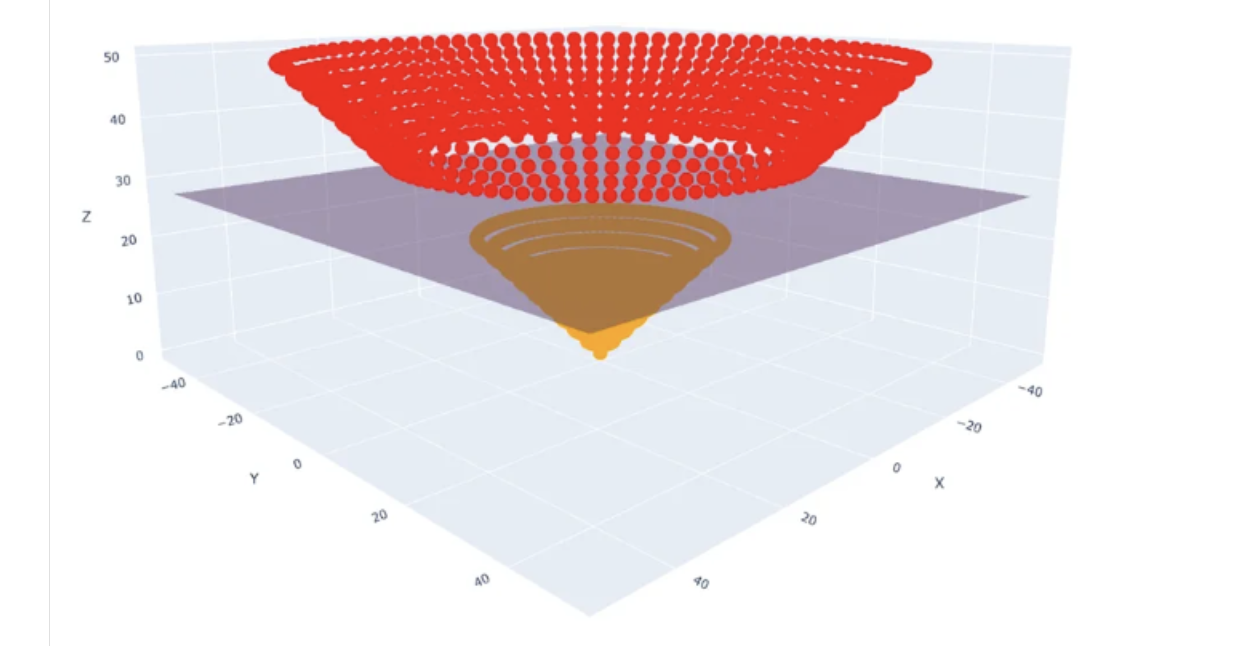

Non-linear SVMs are particularly useful for tasks such as image classification or handwriting recognition, where the data is inherently non-linear and complex.

Additionally, non-linear SVMs can handle datasets with more than two classes, making them versatile for various classification problems.


### What are Kernels and Why Do We Need Kernel Tricks?
Kernels are functions that transform input data into higher-dimensional space where a linear separator can be found. Many real-world problems involve data that is not linearly separable in its original feature space. Kernel tricks help us map this data into a higher dimension where a linear hyperplane can be used for classification, without explicitly computing the transformation.

### Linear Kernel:
Used when data is linearly separable.
    K(x, y) = x . y

### Polynomial Kernel:
Useful for capturing non-linear relationships.
    K(x, y) = (x . y + c)^d

### Radial Basis Function (RBF) Kernel:
Widely used for non-linear classification.
    K(x, y) = exp(-gamma * ||x - y||^2)

### Sigmoid Kernel:
Used for neural network-like behavior.
    K(x, y) = tanh(alpha * x . y + c)


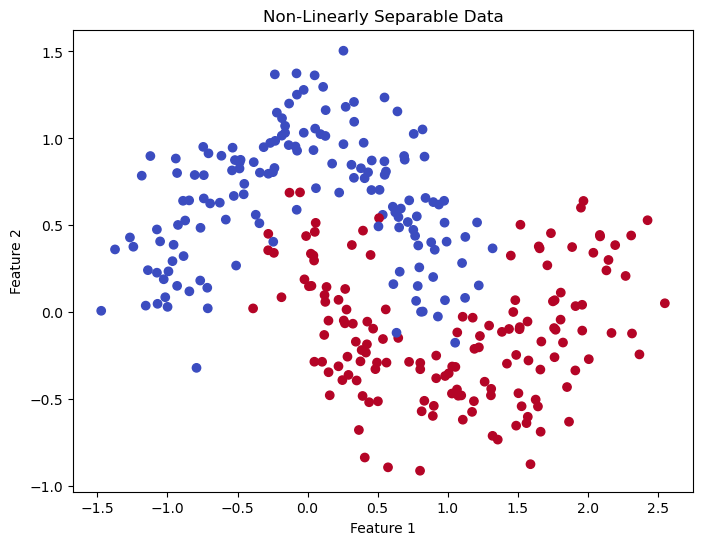

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

#Generating a non-linear dataset
X, y = make_moons(n_samples = 300, noise=0.2, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable Data")
plt.show()

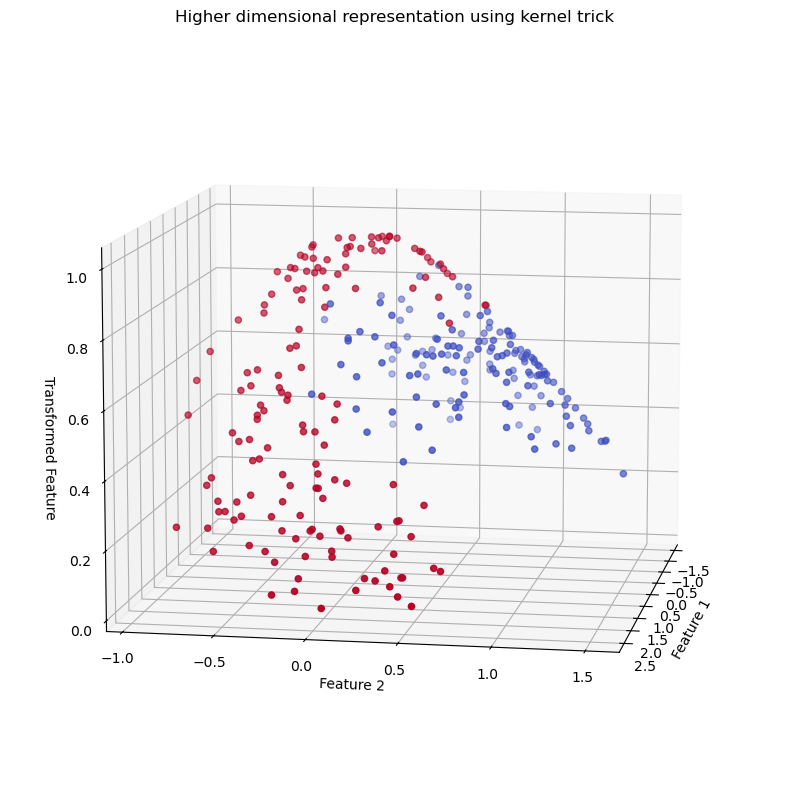

In [19]:
# Transforming data using RBF kernel
X_transformed = np.exp(-0.5 * (X[:,0]**2 + X[:,1]**2))

# Visualizing data in higher dimensions
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X[:,0],X[:,1], X_transformed, c=y, cmap='coolwarm')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Transformed Feature")
ax.set_title("Higher dimensional representation using kernel trick")
ax.view_init(elev=10, azim=10) #adjusting the orientation

plt.show()

# # Adding a hyperplane approximation
# xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 50), np.linspace(-1, 1.5, 50))
# zz = np.exp(-0.5 * (xx**2 + yy**2))
# ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

## 4. Implementing SVM in Scikit-Learn


In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# generate synthetics data
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#training svm model with RBF kernal
svm_model = SVC(kernel='rbf',C=2.0,gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=2.0)

## 5. Hyperparameter: 
Parameter of model/algorithm that can make changes in accuracy of model. It is a configuration setting that is set before the model starts training and cannot be directly learned from the data.
 These settings influence how the model is trained and can significantly impact its performance. In above svc model, kernal, C and gamma are example of hyper parameter. 


In [38]:
#to get hyperparameter
svm_model.get_params()

{'C': 2.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Hyperparameters of SVM
"""
- `C`: Regularization parameter (higher values make a stricter decision boundary)
- `kernel`: Specifies the type of kernel function (linear, poly, rbf, sigmoid)
- `degree`: Degree of polynomial kernel (used when kernel='poly')
- `gamma`: Kernel coefficient (used for 'rbf' and 'poly')
- `coef0`: Independent term in 'poly' and 'sigmoid' kernels
- `max_iter`: Maximum number of iterations
"""

In [36]:
#Prediction
y_pred = svm_model.predict(X_test)

#Evaluating model
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("confusion matrix: \n", confusion_matrix(y_test, y_pred))
print("classification report: \n", classification_report(y_test, y_pred))

accuracy score:  0.88
confusion matrix: 
 [[90  7]
 [17 86]]
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        97
           1       0.92      0.83      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



#### from confusion matrix:
1. 90 = True positive
2. 7 = True Negative
3. 17 = False positive
4. 86 = Flase Negative

### Metrics Explanation

- **Precision** measures the proportion of true positive predictions among all positive predictions made by the model.

> "Of all the instances the model predicted as positive, how many were actually positive?"

- **Recall** measures the proportion of actual positive instances that were correctly identified by the model.

> "Of all the actual positive instances, how many did the model correctly identify?"

- The **F1 score** is the harmonic mean of precision and recall. It provides a balance between the two, especially useful when dealing with imbalanced datasets.

> "How well does the model balance precision and recall?"

    An F1 score of **1** indicates perfect performance; a score of **0** indicates poor performance.

- **Support** refers to the number of actual instances for each class in the dataset.

> "How many samples are there for each class?"

---

### from classification report we can say that:
- **Class 0**: High recall (**0.93**), meaning most class 0 instances were correctly identified, but slightly lower precision (**0.84**).
- **Class 1**: High precision (**0.92**), indicating few false positives, but slightly lower recall (**0.83**).
- The **F1-score** is balanced (**0.88**) for both classes, indicating consistent model performance across them.


## 6. Hyperparameter Tuning with Grid Search

In [39]:
from sklearn.model_selection import GridSearchCV


In [42]:
#defining parameter grid
param_grid = {
    'C': [0.1, 1, 2, 10],
    'kernel': ['linear','rbf','poly'],
    'gamma': ['scale','auto']
}

#performing grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8700000000000001
